In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import readdy

In [2]:
system = readdy.ReactionDiffusionSystem([10.,10.,3], temperature=300.*readdy.units.kelvin, periodic_boundary_conditions=[False, False, False])



system.add_topology_species("R", diffusion_constant=0.1)
system.add_topology_species("L", diffusion_constant=2)
system.add_topology_species("A", diffusion_constant=0.1)

lambda_on = 10.



In [3]:
system.topologies.configure_harmonic_bond(
    "R", "R", force_constant=15, length=0.1
)
system.topologies.configure_harmonic_bond(
    "L", "A", force_constant=50, length=0.1
)

#system.topologies.configure_harmonic_bond(
    #"A", "R", force_constant=15, length=0.1
#)


#for i in range(10):
system.topologies.add_type("Single")

system.topologies.add_type("Act")

system.topologies.add_type("Act2")

system.topologies.add_type("Ligand")

system.topologies.add_type("Double")




system.topologies.add_spatial_reaction(
'Reacton1: Single (R)+Single (R) -> Double (R--R) [self=true]', rate=0.2, radius=10.)


system.topologies.add_spatial_reaction('Reaction2: Single(R)+Ligand(L) -> Act(A--L)', rate=0.1, radius=10.)

#system.topologies.add_spatial_reaction('Reaction3: Act(A)+Single(R) -> Act(A--R)', rate=20., radius=8.)

In [4]:
def convert(topology):
    recipe = readdy.StructuralReactionRecipe(topology)
    recipe.separate_vertex(0)
    recipe.change_particle_type(0, "R")
    
    return recipe
def rate(topology):
    return 0.2
def rate2(topology):
    return 3
def dis(topology):
    recipe = readdy.StructuralReactionRecipe(topology)
    recipe.separate_vertex(0)
    return recipe

system.topologies.add_structural_reaction(name="converti", topology_type="Act",
                                          reaction_function=convert,
                                          rate_function=rate)

system.topologies.add_structural_reaction(name="converti2", topology_type="Double",
                                          reaction_function=dis,
                                          rate_function=rate2)

In [5]:
simulation = system.simulation(kernel="CPU")
simulation.output_file = "out.h5"
simulation.reaction_handler = "Gillespie"

nr = 1


for i in range(200):
    pl = np.random.random(size=(1, 2)) * 10. - 5
    a=np.random.random(size=(1, 1)) * 3. - 1.5
    ligand_top = (simulation.add_topology(
            topology_type = "Ligand",
            particle_types=["L"],
            positions=np.append(pl, a, axis=1)
        ))

    ligand_graph =  ligand_top.get_graph()
    for j in range(len(ligand_graph.get_vertices())-1):
        ligand_graph.add_edge(j, j+1)
        
        

for i in range(10):
    double_top = (simulation.add_topology(

            topology_type = "Double",
            particle_types=["R", "R"],
            positions=np.append(np.random.random(size=(2, 2)) * 10. - 5, (-1.5*np.ones((2, 1))), axis=1)
        ))

    double_graph =  double_top.get_graph()
    for j in range(len(double_graph.get_vertices())-1):
        double_graph.add_edge(j, j+1)

for i in range(1):    
    Act_top = (simulation.add_topology(

                topology_type = "Act",
                particle_types=["A", "L"],
                positions=np.append(np.random.random(size=(2, 2)) * 10. - 5, (-1.5*np.ones((2, 1))), axis=1)
                ))

    Act_graph =  Act_top.get_graph()
    for j in range(len(Act_graph.get_vertices())-1):
        Act_graph.add_edge(j, j+1)
        
for i in range(0):
    Act2_top = (simulation.add_topology(

                topology_type = "Act2",
                particle_types=["L", "A", "R"],
                positions=np.append(np.random.random(size=(3, 2)) * 10. - 5, (-1.5*np.ones((3, 1))), axis=1)
                ))

    Act2_graph =  Act2_top.get_graph()
    Act2_graph.add_edge(0,1)
    Act2_graph.add_edge(2,1)
        
my_topology=[]
my_graph = []

for i in range(100):
    pr = np.random.random(size=(int(nr), 2)) * 10. - 5
    my_topology.append(simulation.add_topology(

        topology_type = "Single",
        particle_types=["R"],
        positions=np.append(pr, (-1.5*np.ones((nr, 1))), axis=1)
    ))

    my_graph.append(my_topology[i].get_graph())
    for j in range(len(my_graph[i].get_vertices())-1):
        my_graph[i].add_edge(j, j+1)

simulation.observe.number_of_particles(
    stride=10,
    types=["R", "L", "A"],
    callback=lambda x: print(x)
)

simulation.record_trajectory()

In [6]:
if os.path.exists(simulation.output_file):
    os.remove(simulation.output_file)

simulation.run(n_steps=5000, timestep=1e-3*readdy.units.nanosecond)

Configured kernel context with:
--------------------------------
 - kBT = 2.4943390049691634
 - periodic b.c. = (false, false, false)
 - box size = (10, 10, 3)
 - particle types:
     * Topology particle type "A" with D=0.1
     * Topology particle type "L" with D=2
     * Topology particle type "R" with D=0.1
 - topology potential configuration:
     - bonds (2):
         - Bonds for particle types L and A:
             * Harmonic bond with force constant 50 and length 0.1
         - Bonds for particle types R and R:
             * Harmonic bond with force constant 15 and length 0.1
 - topology types:
     * topology type "Single" with 0 structural reactions
     * topology type "Act" with 1 structural reactions
     * topology type "Act2" with 0 structural reactions
     * topology type "Ligand" with 0 structural reactions
     * topology type "Double" with 1 structural reactions
 - spatial topology reactions:
     * Topology-topology fusion reaction "Reaction2: Single(R) + Ligand(L)

  0%|                                                   | 0/500 [00:00<?, ?it/s]

[120, 201, 1]


  0%|▏                                          | 2/500 [00:00<02:33,  3.24it/s]

[109, 201, 12]
[107, 201, 14]


  1%|▍                                          | 5/500 [00:00<01:07,  7.35it/s]

[103, 201, 18]
[101, 201, 20]
[95, 201, 26]
[95, 201, 26]


  2%|▊                                         | 10/500 [00:01<00:34, 14.38it/s]

[91, 201, 30]
[87, 200, 35]
[85, 200, 37]
[85, 200, 37]
[84, 200, 38]
[82, 200, 40]


  3%|█▍                                        | 17/500 [00:01<00:20, 23.16it/s]

[81, 200, 41]
[80, 199, 43]
[80, 199, 43]
[80, 199, 43]
[80, 199, 43]
[79, 199, 44]
[79, 199, 44]
[77, 199, 46]


  5%|██▏                                       | 26/500 [00:01<00:14, 32.31it/s]

[77, 199, 46]
[76, 199, 47]
[76, 199, 47]
[75, 199, 48]
[73, 199, 50]
[72, 199, 51]
[72, 199, 51]
[72, 199, 51]
[72, 199, 51]
[72, 199, 51]


  7%|███                                       | 36/500 [00:01<00:11, 39.61it/s]

[72, 199, 51]
[72, 199, 51]
[72, 199, 51]
[72, 199, 51]
[72, 199, 51]
[71, 199, 52]
[70, 199, 53]
[71, 198, 53]
[70, 198, 54]
[70, 198, 54]
[70, 198, 54]


 10%|████                                      | 48/500 [00:02<00:09, 46.28it/s]

[70, 198, 54]
[70, 198, 54]
[70, 198, 54]
[70, 198, 54]
[70, 198, 54]
[69, 198, 55]
[69, 198, 55]
[69, 198, 55]
[69, 198, 55]
[69, 198, 55]
[71, 196, 55]
[71, 196, 55]


 12%|█████▏                                    | 62/500 [00:02<00:07, 55.20it/s]

[71, 196, 55]
[71, 196, 55]
[71, 196, 55]
[71, 196, 55]
[71, 196, 55]
[71, 196, 55]
[71, 196, 55]
[71, 196, 55]
[71, 196, 55]
[71, 196, 55]
[70, 196, 56]
[70, 196, 56]
[70, 196, 56]


 15%|██████▎                                   | 75/500 [00:02<00:07, 59.79it/s]

[70, 196, 56]
[70, 196, 56]
[71, 195, 56]
[71, 195, 56]
[71, 195, 56]
[71, 195, 56]
[71, 195, 56]
[71, 195, 56]
[71, 195, 56]
[71, 195, 56]
[71, 195, 56]
[71, 195, 56]
[71, 195, 56]
[70, 195, 57]


 18%|███████▌                                  | 90/500 [00:02<00:06, 64.32it/s]

[70, 195, 57]
[70, 195, 57]
[70, 195, 57]
[70, 195, 57]
[70, 195, 57]
[70, 195, 57]
[71, 194, 57]
[71, 193, 58]
[71, 193, 58]
[71, 193, 58]
[71, 193, 58]
[72, 192, 58]
[72, 192, 58]
[72, 192, 58]


 21%|████████▌                                | 105/500 [00:02<00:05, 68.01it/s]

[72, 192, 58]
[72, 192, 58]
[73, 191, 58]
[73, 191, 58]
[73, 191, 58]
[73, 191, 58]
[73, 191, 58]
[73, 191, 58]
[73, 191, 58]
[73, 191, 58]
[73, 191, 58]
[72, 191, 59]
[73, 190, 59]
[73, 190, 59]
[73, 190, 59]


 24%|█████████▊                               | 119/500 [00:03<00:06, 62.89it/s]

[73, 190, 59]
[73, 190, 59]
[73, 190, 59]
[74, 189, 59]
[74, 189, 59]
[74, 189, 59]
[75, 188, 59]
[75, 188, 59]
[75, 188, 59]
[75, 188, 59]
[75, 188, 59]
[75, 188, 59]


 25%|██████████▎                              | 126/500 [00:03<00:06, 59.96it/s]

[75, 188, 59]
[75, 188, 59]
[75, 188, 59]
[75, 188, 59]
[76, 187, 59]
[76, 187, 59]
[76, 187, 59]
[76, 187, 59]
[76, 187, 59]
[76, 187, 59]
[76, 187, 59]


 28%|███████████▌                             | 141/500 [00:03<00:05, 59.93it/s]

[76, 187, 59]
[77, 187, 58]
[77, 187, 58]
[77, 187, 58]
[77, 187, 58]
[77, 187, 58]
[77, 187, 58]
[77, 187, 58]
[77, 187, 58]
[77, 186, 59]
[77, 186, 59]
[77, 186, 59]
[77, 186, 59]
[77, 186, 59]
[77, 186, 59]
[77, 186, 59]


 31%|████████████▊                            | 157/500 [00:03<00:05, 66.82it/s]

[77, 186, 59]
[77, 186, 59]
[77, 186, 59]
[77, 186, 59]
[77, 186, 59]
[78, 185, 59]
[78, 185, 59]
[78, 185, 59]
[78, 185, 59]
[78, 185, 59]
[78, 185, 59]
[78, 185, 59]
[78, 185, 59]
[78, 185, 59]
[78, 185, 59]
[78, 185, 59]


 35%|██████████████▏                          | 173/500 [00:03<00:04, 70.97it/s]

[78, 185, 59]
[78, 185, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]


 38%|███████████████▌                         | 190/500 [00:04<00:04, 75.33it/s]

[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[79, 184, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]


 42%|█████████████████▏                       | 209/500 [00:04<00:03, 80.03it/s]

[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[80, 183, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]


 45%|██████████████████▌                      | 227/500 [00:04<00:03, 79.36it/s]

[81, 182, 59]
[81, 182, 59]
[82, 182, 58]
[82, 182, 58]
[82, 182, 58]
[81, 182, 59]
[81, 182, 59]
[81, 182, 59]
[82, 181, 59]
[83, 180, 59]
[83, 180, 59]
[83, 180, 59]
[83, 180, 59]
[83, 180, 59]
[83, 180, 59]
[82, 180, 60]
[82, 180, 60]


 49%|████████████████████                     | 245/500 [00:04<00:03, 82.24it/s]

[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]


 53%|█████████████████████▌                   | 263/500 [00:05<00:02, 84.04it/s]

[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]


 56%|███████████████████████                  | 281/500 [00:05<00:02, 84.56it/s]

[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[82, 180, 60]
[83, 179, 60]
[83, 179, 60]
[83, 179, 60]
[83, 179, 60]
[83, 179, 60]
[83, 179, 60]


 60%|████████████████████████▌                | 299/500 [00:05<00:02, 83.87it/s]

[83, 179, 60]
[83, 179, 60]
[83, 179, 60]
[83, 179, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]
[84, 178, 60]


 63%|█████████████████████████▉               | 317/500 [00:05<00:02, 82.30it/s]

[85, 178, 59]
[85, 178, 59]
[85, 178, 59]
[85, 178, 59]
[85, 178, 59]
[85, 178, 59]
[85, 178, 59]
[85, 178, 59]
[85, 178, 59]
[85, 178, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]


 67%|███████████████████████████▍             | 335/500 [00:05<00:02, 82.29it/s]

[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]


 71%|████████████████████████████▉            | 353/500 [00:06<00:01, 81.52it/s]

[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]
[86, 177, 59]


 74%|██████████████████████████████▌          | 372/500 [00:06<00:01, 85.05it/s]

[86, 177, 59]
[87, 176, 59]
[87, 176, 59]
[87, 176, 59]
[87, 176, 59]
[87, 176, 59]
[87, 176, 59]
[87, 176, 59]
[87, 176, 59]
[87, 176, 59]
[88, 176, 58]
[88, 176, 58]
[89, 176, 57]
[89, 176, 57]
[89, 176, 57]
[89, 176, 57]
[89, 176, 57]
[90, 176, 56]


 78%|████████████████████████████████         | 391/500 [00:06<00:01, 87.28it/s]

[90, 176, 56]
[90, 176, 56]
[90, 176, 56]
[90, 176, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]
[91, 175, 56]


 82%|█████████████████████████████████▌       | 410/500 [00:06<00:01, 89.44it/s]

[91, 175, 56]
[91, 175, 56]
[90, 175, 57]
[90, 175, 57]
[90, 175, 57]
[90, 175, 57]
[90, 175, 57]
[90, 175, 57]
[90, 175, 57]
[90, 175, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]


 86%|███████████████████████████████████▎     | 430/500 [00:06<00:00, 92.63it/s]

[91, 174, 57]
[90, 174, 58]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[91, 174, 57]
[92, 174, 56]
[92, 174, 56]
[93, 173, 56]
[93, 173, 56]
[93, 173, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]


 90%|████████████████████████████████████▉    | 450/500 [00:07<00:00, 91.61it/s]

[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]


 94%|██████████████████████████████████████▌  | 470/500 [00:07<00:00, 91.94it/s]

[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[94, 172, 56]
[95, 171, 56]
[95, 171, 56]
[95, 171, 56]
[95, 171, 56]
[95, 171, 56]
[95, 171, 56]
[95, 171, 56]
[95, 171, 56]
[96, 170, 56]


 96%|███████████████████████████████████████▎ | 480/500 [00:07<00:00, 87.55it/s]

[96, 170, 56]
[96, 170, 56]
[96, 170, 56]
[96, 170, 56]
[96, 170, 56]
[96, 170, 56]
[96, 170, 56]
[96, 170, 56]
[96, 170, 56]
[97, 169, 56]
[97, 169, 56]
[98, 168, 56]
[98, 168, 56]
[99, 167, 56]
[100, 167, 55]
[100, 167, 55]
[100, 167, 55]
[100, 167, 55]


100%|█████████████████████████████████████████| 500/500 [00:07<00:00, 64.14it/s]

[100, 167, 55]
[101, 167, 54]
[101, 167, 54]
[102, 166, 54]
[102, 166, 54]
[102, 166, 54]
[102, 166, 54]
[102, 166, 54]
[102, 166, 54]
[102, 166, 54]
[102, 166, 54]
[102, 166, 54]


In [7]:
traj = readdy.Trajectory(simulation.output_file)
time, counts = traj.read_observable_number_of_particles()

In [8]:
traj.convert_to_xyz(particle_radii={'A': 0.3, 'B':0.3, 'C':0.3, 'R':0.3, 'L':0.3, 'Act':0.3})

In [9]:
!vmd -e out.h5.xyz.tcl

/usr/local/lib/vmd/vmd_LINUXAMD64: /usr/lib/x86_64-linux-gnu/libGL.so.1: no version information available (required by /usr/local/lib/vmd/vmd_LINUXAMD64)
Info) VMD for LINUXAMD64, version 1.9.3 (November 30, 2016)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 4 CPUs detected.
Info)   CPU features: SSE2 AVX AVX2 FMA 
Info) Free system memory: 11GB (72%)
Info) No CUDA accelerator devices available.
Warning) Detected X11 'Composite' extension: if incorrect display occurs
Warning) try disabling this X server option.  Most OpenGL drivers
Warning) disable stereoscopic display when 'Composite' is enabled.


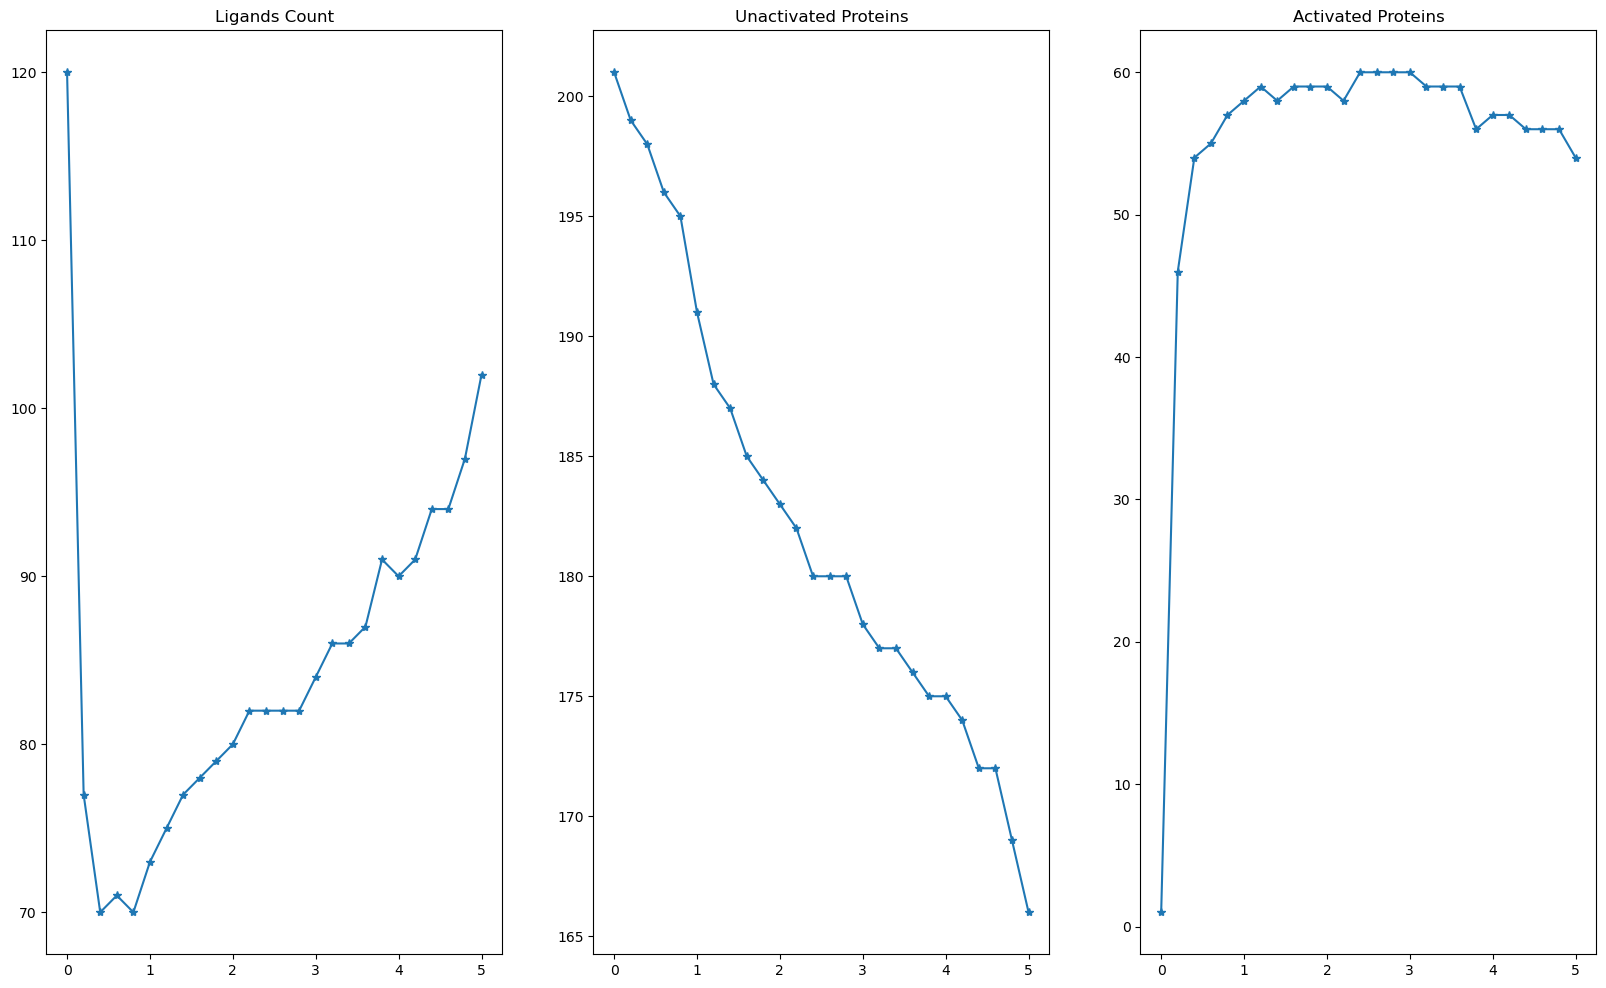

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(20,12))
axs[0].plot(time[::20]*1e-3, counts[::20,0], "*-")
axs[0].set_title('Ligands Count')
axs[1].plot(time[::20]*1e-3, counts[0::20,1], "*-")
axs[1].set_title('Unactivated Proteins')
axs[2].plot(time[::20]*1e-3, counts[0::20,2], "*-")
axs[2].set_title('Activated Proteins')
plt.savefig('ligand docking.png')

In [11]:
 -1.5*np.ones((2, 1))

array([[-1.5],
       [-1.5]])

In [12]:
counts

array([[120, 201,   1],
       [109, 201,  12],
       [107, 201,  14],
       ...,
       [102, 166,  54],
       [102, 166,  54],
       [102, 166,  54]], dtype=uint64)